# ACSE-9 Independent Research Project
## Evaluating the Changes in Temporal Dynamics of Climate Variables and Wildfires in Pantanal of Tropical South America
### Notebook version
#### Please upload "Fires in Pantanal.cs" and "prec_1.csv" files in the repository before excute any cell

In [1]:
R.version.string

[1] "R version 4.1.1 (2021-08-10)"

In [5]:
install.packages('trend')
install.packages('data.table')
install.packages('dplyr')
install.packages('Kendall')
install.packages('zoo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
library('trend')
library(data.table)
library(dplyr)
library(Kendall)
library(zoo)

## Define study period (2000 - 2018)


In [7]:
years <- list('2000','2001','2002','2003','2004','2005','2006','2007',
              '2008','2009','2010','2011','2012','2013','2014','2015',
              '2016','2017','2018')
years <- as.numeric(as.character(unlist(years)))

## Read fire and pricipitation data

In [8]:
data_fire <- read.csv("Fires in Pantanal.csv", nrow=19, header = TRUE)

In [29]:
data_prec <- read.csv("prec_1.csv", header = TRUE)
prec_list <- data_prec$Average_Prec[1:19]

In [11]:
head(data_fire, 3)

,X,WKT,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,1,MULTIPOINT ((-57.8495 -21.0572)),-21.0572,-57.8495,325.1,1.0,1.0,2001-07-14,1418,Terra,MODIS,70,6.03,297.9,17.9,D,0
2,2,MULTIPOINT ((-57.8509 -21.0662)),-21.0662,-57.8509,349.1,1.0,1.0,2001-07-14,1418,Terra,MODIS,0,6.03,298.6,55.9,D,0
3,3,MULTIPOINT ((-57.8911 -20.7524)),-20.7524,-57.8911,322.9,1.7,1.3,2001-07-19,1437,Terra,MODIS,0,6.03,299.0,27.5,D,0


## Read fire information for a particular year 


In [13]:
read_year <- function(start_date, end_date){
  df = read.csv("Fires in Pantanal.csv")
  year <- subset(df, ACQ_DATE>= start_date & ACQ_DATE <= end_date & FRP)
  sapply(year, class)
  return(year)
}

## Loop over data from 2000-2018

In [28]:
fire_list <- list()

for (i in 1:19){
  start_date <- c("2000-01-01", "2001-01-01","2002-01-01","2003-01-01","2004-01-01","2005-01-01","2006-01-01",
                  "2007-01-01","2008-01-01","2009-01-01","2010-01-01","2011-01-01","2012-01-01","2013-01-01",
                  "2014-01-01","2015-01-01","2016-01-01","2017-01-01","2018-01-01")
  end_date <- c( "2000-12-31","2001-12-31","2002-12-31","2003-12-31","2004-12-31","2005-12-31","2006-12-31",
                "2007-12-31","2008-12-31","2009-12-31","2010-12-31","2011-12-31","2012-12-31","2013-12-31",
                "2014-12-31","2015-12-31","2016-12-31","2017-12-31","2018-12-31")

  data<- read_year(start_date[i], end_date[i])
  data <- as.data.frame(data)
  
  # Count fire foci in each year
  fire_list[i] <- count(data)/6
}


## Ensure fire and prec lists are ready to plot graphs

In [35]:
fire_list <- as.numeric(as.character(unlist(fire_list)))
fire_list <- ceiling (fire_list)
prec_list <- as.numeric(as.character(unlist(prec_list)))
prec_list <- round(prec_list,3)

In [36]:
fire_list

[1]   85 1507 4274 1185 2579 3914  935 3011 1461 1921 2630 1341 2272 1231  468
[16] 1442 1637 1743  511

In [37]:
prec_list

[1] 103.253 112.386  80.601 106.161 104.009  91.079 112.977 110.746  99.156
[10] 111.036  95.412 119.045  94.399  93.959 115.125 105.364 116.099 112.264
[19] 106.629

## Apply MK Tests


In [38]:
mk.test(fire_list, continuity = TRUE)
mk.test(prec_list, continuity = TRUE)


	Mann-Kendall trend test

data:  fire_list
z = -0.83965, n = 19, p-value = 0.4011
alternative hypothesis: true S is not equal to 0
sample estimates:
          S        varS         tau 
-25.0000000 817.0000000  -0.1461988 



	Mann-Kendall trend test

data:  prec_list
z = 1.0496, n = 19, p-value = 0.2939
alternative hypothesis: true S is not equal to 0
sample estimates:
          S        varS         tau 
 31.0000000 817.0000000   0.1812865 


## Calculate local regression


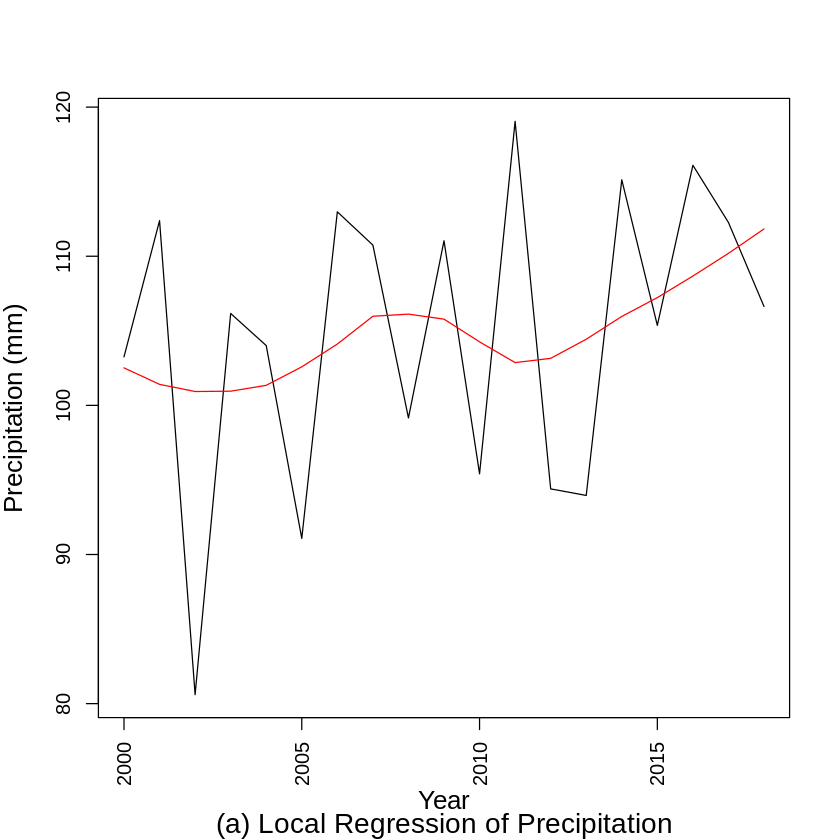

In [42]:
loessMod1 <- loess(prec_list~years)
# smooth output
pr.loess <- predict(loessMod1) # Predict Loess
# Plot
plot(years, prec_list, "l", las=3, cex.lab=1.3, cex.sub=1.4,
     sub="(a) Local Regression of Precipitation", 
     xlab="Year", ylab="Precipitation (mm)")
lines(pr.loess~years, col="red", lwd=1)

## Generate second order linear model


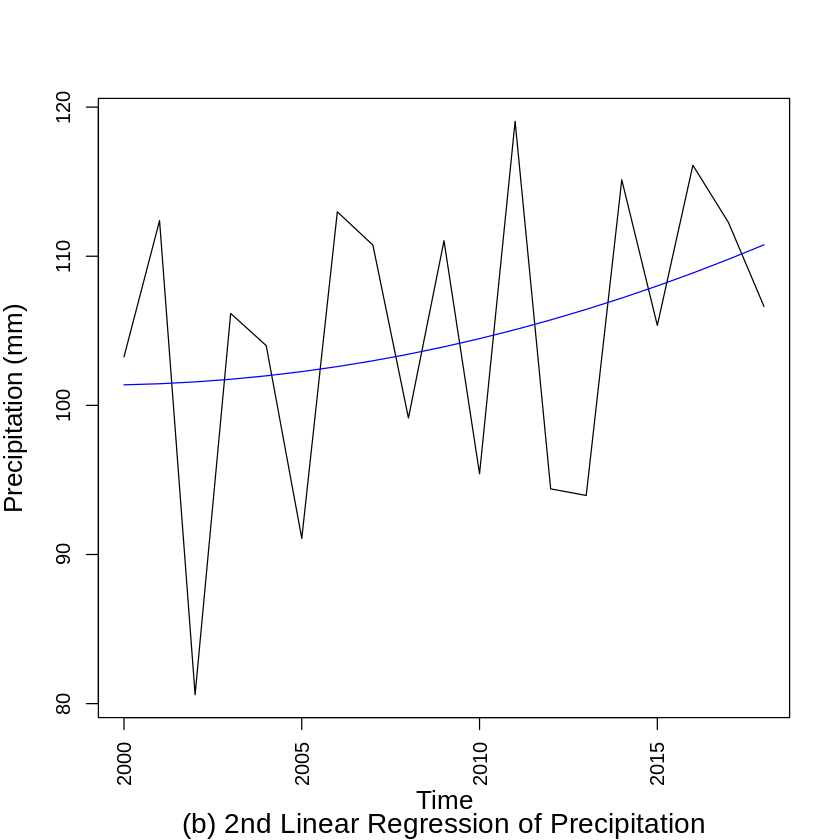

In [40]:
lin.mod2 <- lm(prec_list~I(years^2)+years)
# smooth output
pr.lm2 <- predict(lin.mod2) # Predict Loess
# Plot
plot(years, prec_list, "l", las=3, cex.lab=1.3, cex.sub=1.4,
     sub="(b) 2nd Linear Regression of Precipitation", 
     xlab="Time", ylab="Precipitation (mm)")
lines(pr.lm2~years, col="blue", lwd=1)

## Calculate local regression


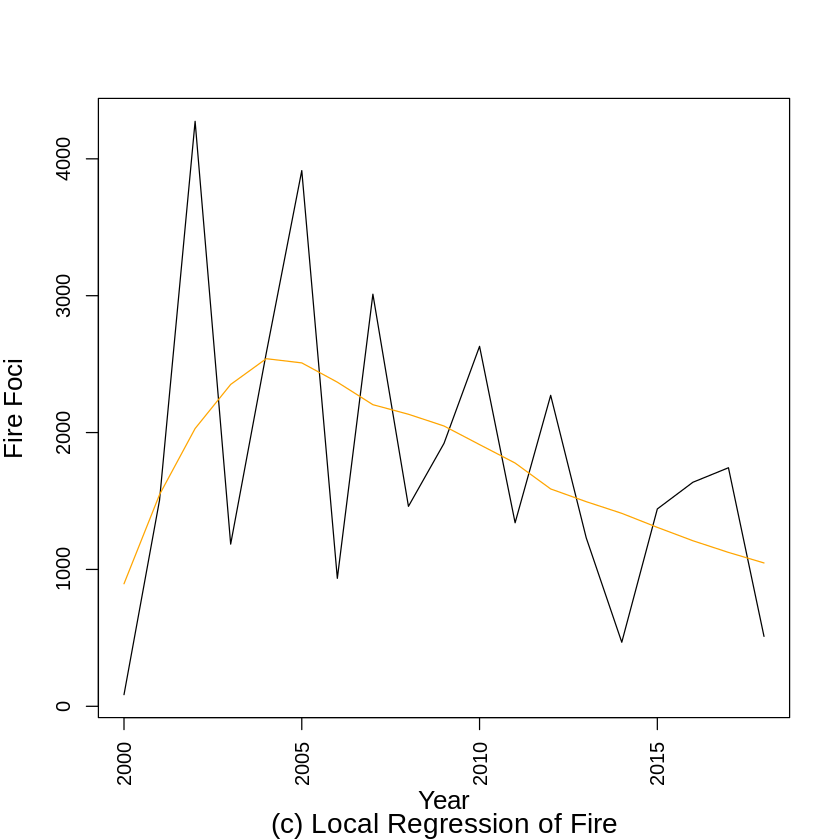

In [43]:
loessMod1 <- loess(fire_list~years)
# smooth output
pr.loess <- predict(loessMod1) # Predict Loess
# Plot
plot(years, fire_list, "l", las=3, cex.lab=1.3, cex.sub=1.4, 
     sub="(c) Local Regression of Fire", 
     xlab="Year", ylab="Fire Foci")
lines(pr.loess~years, col="orange", lwd=1)

## Generate second order linear model


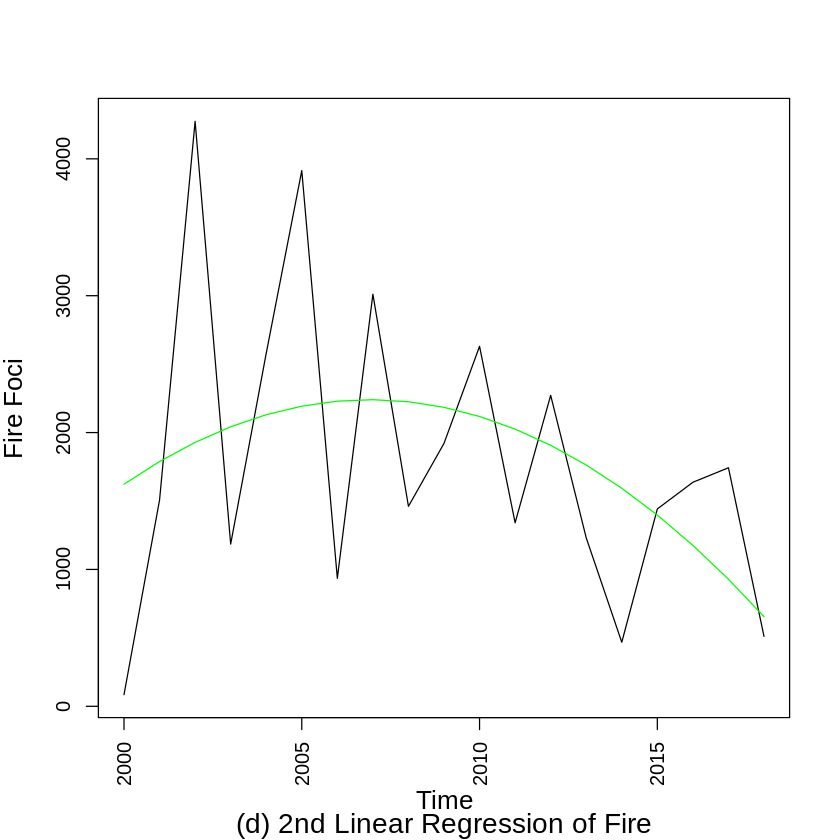

In [44]:
lin.mod2 <- lm(fire_list~I(years^2)+years)
# smooth output
pr.lm2 <- predict(lin.mod2) # Predict Loess
# Plot
plot(years, fire_list, "l", las=3, cex.lab=1.3, cex.sub=1.4,
     sub="(d) 2nd Linear Regression of Fire", 
     xlab="Time", ylab="Fire Foci")
lines(pr.lm2~years, col="green", lwd=1)

# First order linear regression


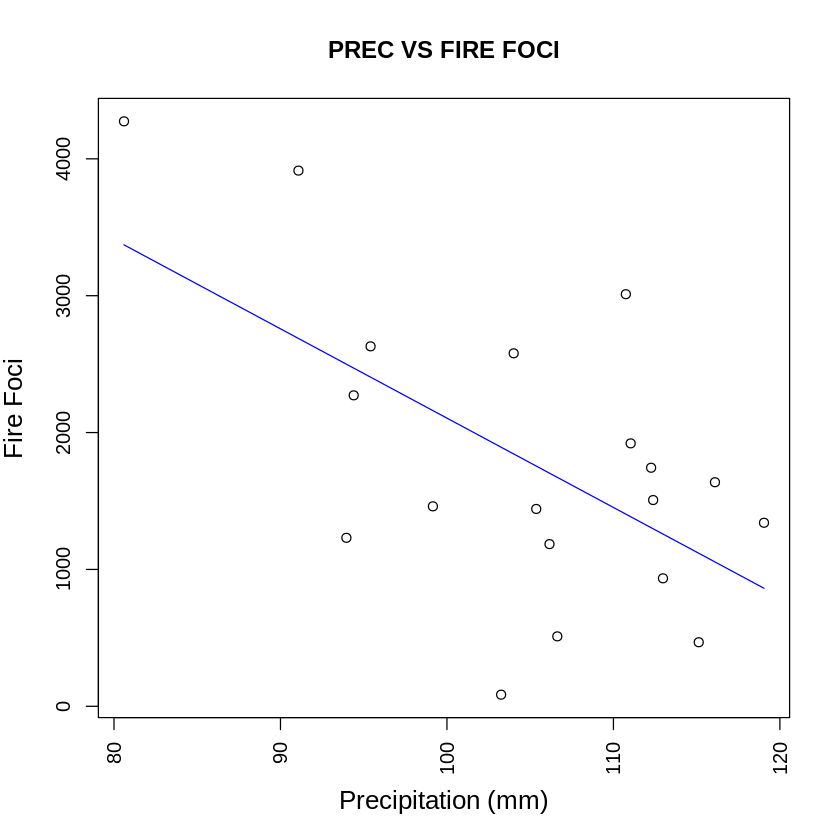

In [45]:
par(mfrow= c(1,1))
lin.mod <- lm(fire_list~prec_list)
pr.lm <- predict(lin.mod)
plot(prec_list, fire_list, las=3, cex.lab=1.3, cex.sub=1.4,
     main="PREC VS FIRE FOCI",
     xlab="Precipitation (mm)", ylab="Fire Foci")
lines(pr.lm~prec_list, col="blue", lwd=1)